In [1]:
%reset -f
# import the necessary packages
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
# from pyimagesearch.lenet import LeNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

In [26]:
# construct the argument parse and parse the arguments
dataset = './insectrec/created_data/impy_crops_export/'

img_width, img_height = 60,60

# initialize the data and labels
print(" loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_width, img_height))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

 loading images...


In [27]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.2, random_state=42)

In [28]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, zoom_range=0.3,
    horizontal_flip=True, fill_mode="nearest")

In [37]:
aug_imgs_path = './insectrec/created_data/images_augmented/'

rdm = np.random.randint(0,1e6)

for i in np.unique(trainY):
    if not os.path.isdir(f'{aug_imgs_path}/{i}'):
        os.mkdir(f'{aug_imgs_path}/{i}')

aug.fit(trainX)
nb_batches = 0
for X_batch, y_batch in aug.flow(trainX, trainY, 
         batch_size=32, seed=42):
    for i, mat in enumerate(X_batch):
        rdm = np.random.randint(0,1e6)
        cv2.imwrite(f'{aug_imgs_path}/{y_batch[i]}/{y_batch[i]}_{rdm}{i}.jpg', cv2.cvtColor(mat*255, cv2.COLOR_RGB2BGR))
    nb_batches += 1
    
    if nb_batches > 5000:
        break

KeyboardInterrupt: 

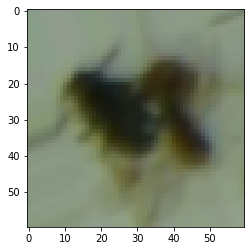

In [35]:
# image = cv2.imread(imagePaths[-12])
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(mat)
plt.show()

In [16]:
cv2.imwrite('TEST.jpg', mat*255)

True

In [79]:
trainY.shape

(14064, 6)